In [82]:
from IPython.display import Image
from sklearn import ensemble
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV 
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report
from sklearn.tree import DecisionTreeClassifier
import graphviz
import numpy as np
import pandas as pd
import pydotplus
import scipy.stats as stats
import timeit

In [83]:
df = pd.read_csv('Student_Data.csv',encoding='Latin-1') #how we choose the encoding?
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


* Gender - student's gender (nominal: 'Male' or 'Female’)
* Relation - Parent responsible for student (nominal:’mom’,’father’)
* Raised hand- how many times the student raises his/her hand on classroom (numeric:0-100)
* Visited resources- how many times the student visits a course content(numeric:0-100)
* Viewing announcements-how many times the student checks the new announcements(numeric:0-100)
* Discussion groups- how many times the student participate on discussion groups (numeric:0-100)
* Student Absence Days-the number of absence days for each student (nominal: above-7, under-7)

#### CONTINUOUS VARIABLES:
* raisedhands
* Visited resource
* Viewing announcements
* Discussion groups

SOURCE: Elaf Abu Amrieh, Thair Hamtini, and Ibrahim Aljarah, The University of Jordan, Amman, Jordan, http://www.Ibrahimaljarah.com www.ju.edu.jo

# Holdout (splitting data)

In [84]:
x = df[['raisedhands','VisITedResources','AnnouncementsView','Discussion']]
y = df[['gender']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Select Kbest

In [85]:
x_new = SelectKBest(chi2, k=3)
x_new.fit_transform(x_train, y_train)
print(x_new.get_support())

[ True  True False  True]


If we set the k=3, the variable 'AnnouncementsView' was removed.

## Decision Tree Model

### Criterion: Entropy (Information Gain)

In [86]:
start_time = timeit.default_timer()

for i in range(1,11,1):
    decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 0)
    X = df[['raisedhands','VisITedResources','Discussion']]
    Y = df['gender']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
    decision_tree.fit(X_train,Y_train)

    dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X_train.columns, class_names=['Male', 'Female'], filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())
    print('Depth: {}'.format(i))
    print('Model Performance: {:.2%}.\n'.format(cross_val_score(decision_tree, X_train, Y_train, cv=10).mean()))

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

Depth: 1
Model Performance: 56.14%.

Depth: 2
Model Performance: 55.45%.

Depth: 3
Model Performance: 56.86%.

Depth: 4
Model Performance: 56.55%.

Depth: 5
Model Performance: 53.48%.

Depth: 6
Model Performance: 56.89%.

Depth: 7
Model Performance: 60.00%.

Depth: 8
Model Performance: 60.37%.

Depth: 9
Model Performance: 57.63%.

Depth: 10
Model Performance: 56.92%.

--- Runtime: 7.971770267991815 seconds. ---


### Best-Performing Tree: max_depth = 2

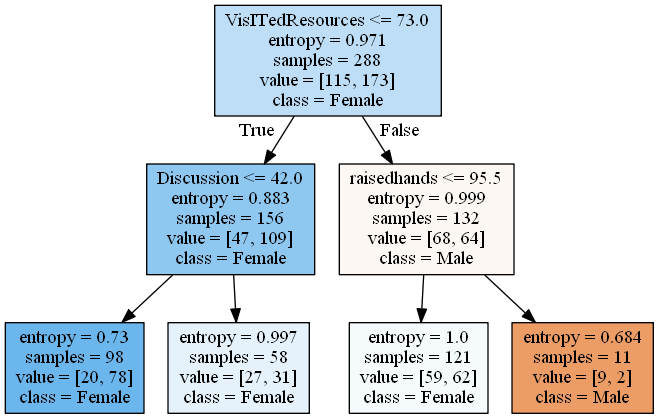

In [87]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 0)
X = df[['raisedhands','VisITedResources','Discussion']]
Y = df['gender']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
decision_tree.fit(X_train,Y_train)

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X_train.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [97]:
start_time = timeit.default_timer()

decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 2, random_state = 0)
X = df[['raisedhands','VisITedResources','Discussion']]
Y = df['gender']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
dtmodel=decision_tree.fit(X_train,Y_train)

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X_train.columns, class_names=['Male', 'Female'], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

--- Runtime: 0.321892380762165 seconds. ---


### Cross validation

In [98]:
scores = cross_val_score(decision_tree, X_train, Y_train, cv=10)
print(scores)

[0.53333333 0.63333333 0.6        0.51724138 0.68965517 0.46428571
 0.53571429 0.57142857 0.5        0.5       ]


### Classification_report and Confusion matrix

In [99]:
Y_pred = dtmodel.predict(X_test) 

In [100]:
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.6822916666666666
             precision    recall  f1-score   support

          F       0.00      0.00      0.00         1
          M       0.99      0.69      0.81       191

avg / total       0.99      0.68      0.81       192

Confusion matrix:
[[  0  60]
 [  1 131]]


## Random forest model

In [101]:
rfc = ensemble.RandomForestClassifier()
dtmodel_R=rfc.fit(X_test, Y_test)
names_importances = {}
for feature, importance in zip(X_test.columns, rfc.feature_importances_):
    names_importances[feature] = importance
    names_importances_desc = sorted(names_importances.items(), key=lambda x: x[1], reverse=True)
    names_importances_desc = pd.DataFrame(names_importances_desc, columns=['feature','importance'])
names_importances_desc

,feature,importance
0,VisITedResources,0.35486
1,Discussion,0.33078
2,raisedhands,0.31436


### Classification_report and Confusion matrix

In [102]:
Y_pred = dtmodel_R.predict(X_test) 

In [103]:
accuracy = accuracy_score(Y_test,Y_pred)
report = classification_report(Y_pred, Y_test)
cm = confusion_matrix(Y_test,Y_pred)

print("Classification report:")
print("Accuracy: ", accuracy)
print(report)
print("Confusion matrix:")
print(cm)

Classification report:
Accuracy:  0.9791666666666666
             precision    recall  f1-score   support

          F       0.97      0.97      0.97        60
          M       0.98      0.98      0.98       132

avg / total       0.98      0.98      0.98       192

Confusion matrix:
[[ 58   2]
 [  2 130]]


# PCA

In [110]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df[['raisedhands','VisITedResources','AnnouncementsView','Discussion']]
Y = df[['gender']]
X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=4)
df["pca_1"] = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.62714744 0.20387185 0.09448235 0.07449836]
